In [1]:
import numpy as np
import matplotlib.pyplot as plt

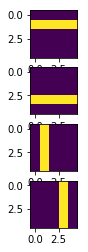

In [97]:
#generate data
fig,ax = plt.subplots(4)
all_features = np.zeros((4,25))
feat1 = np.zeros((5,5))
feat1[1,:] = 1
ax[0].imshow(feat1)

all_features[0,:] = feat1.flatten()

feat2 = np.zeros((5,5))
feat2[3,:] = 1
ax[1].imshow(feat2)

all_features[1,:] = feat2.flatten()

feat3 = np.zeros((5,5))
feat3[:,1] = 1
ax[2].imshow(feat3)

all_features[2,:] = feat3.flatten()

feat4 = np.zeros((5,5))
feat4[:,3] = 1
ax[3].imshow(feat4)
plt.show()
all_features[3,:] = feat4.flatten()
all_features = all_features - np.mean(all_features)
all_features = all_features/np.std(all_features) 

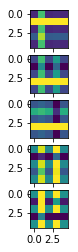

[ 1.83935478  0.27946165  0.94068331  0.01567124]


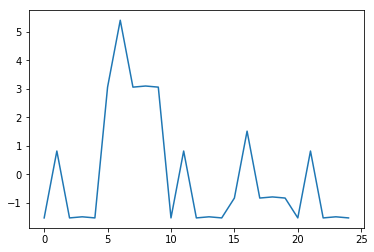

In [122]:
true_loadings = np.random.normal(size=(1000,4))
data = np.dot(true_loadings, all_features)

fig,ax = plt.subplots(5)
for i in range(5):
    ax[i].imshow(data[i,:].reshape(5,5),vmin=-2,vmax=2)

plt.show()
print(true_loadings[0,:])
plt.plot(data[0,:])
plt.show()

In [103]:
def gibbs_sampler_uncollapsed(data, sigy,sigl,K,maxit=1000,F = None):
    N,D= data.shape
    if F is None:
        F = np.zeros((N,K))
   
    Lambda = np.zeros((K,D))
    
    for iter in range(maxit):
        
        #sample Lambda
        for d in range(D):
            invcov = (1./sigl)*np.eye(K) + (1./sigy)*np.dot(F.T,F)
            cov = np.linalg.inv(invcov)
            m = np.dot(cov, np.dot(F.T,data[:,d]))
            Lambda[:,d] = np.random.multivariate_normal(m,cov)
        #sample F
        for n in range(N):
            invcov = np.eye(K) + (1./sigy)*np.dot(Lambda,Lambda.T)
            cov = np.linalg.inv(invcov)
            m = np.dot(cov, np.dot(Lambda,data[n,:]))
            F[n,:] = np.random.multivariate_normal(m,cov)
        if iter%100==0:
            print('.') #reassuring dots
    return F,Lambda

In [114]:
F,Lambda = gibbs_sampler_uncollapsed(data,0.1,1.,4,maxit=100)

.


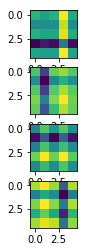

In [115]:
fig,ax = plt.subplots(4)
for i in range(4):
    ax[i].imshow(Lambda[i,:].reshape(5,5))
plt.show()

.
.
.
.
.


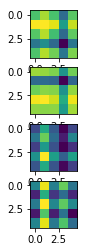

In [119]:
F,Lambda = gibbs_sampler_uncollapsed(data,0.1,1.,4,maxit=500)
fig,ax = plt.subplots(4)
for i in range(4):
    ax[i].imshow(Lambda[i,:].reshape(5,5))
plt.show()

.
.
.
.
.


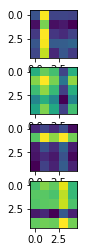

In [116]:
F,Lambda = gibbs_sampler_uncollapsed(data,0.1,1.,4,maxit=500)
fig,ax = plt.subplots(4)
for i in range(4):
    ax[i].imshow(Lambda[i,:].reshape(5,5))
plt.show()